The objective of this experiment is to understand word2vec.

In this experiment we will use **Mahabharata** as our text corpus

##### Importing the required packages

In [1]:
import gensim
# Operating System
import os
# Regular Expression
import re
# nltk packages
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer
# Basic Packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# PCA Package
from sklearn.decomposition import PCA

Snowball is a small string processing language designed for creating stemming algorithms for use in Information Retrieval. 

##### Creating a new instance of a language specific subclass.

In [2]:
stemmer = SnowballStemmer("english")

##### In below cell we are trying to pre-process the text data and not stemming the stop words

In [3]:
stopWords = pd.read_csv('stopwords.txt').values

class MySentences(object):
    def __init__(self, fnamelist):
        self.fnamelist = fnamelist
        # Creating a set of vocabulary
        self.vocabulary = set([])

    def __iter__(self):
        for fname in self.fnamelist:
            for line in open(fname, encoding='latin1'):
                # Find all the words that has letters from 2 - 15. If the words are longer than that ignore.
                words = re.findall(r'(\b[A-Za-z][a-z]{2,15}\b)', line)
                # Stemming a word.
                words = [ stemmer.stem(word.lower()) for word in words if not word.lower() in stopWords]
                for word in words:
                    self.vocabulary.add(word)
                yield words

##### In below cell we will read the data using an iterator in the class MySentences(). 

Gensim model: https://radimrehurek.com/gensim/models/word2vec.html

In [5]:
sentences = MySentences(['MB.txt']) # a memory-friendly iterator
model = gensim.models.Word2Vec(sentences, min_count=100)
#model_load = gensim.models.Word2Vec.load('MB2Vec.bin')

In [6]:
model_load = model

##### Lets see the most similar words related to different characters

In [7]:
model_load.wv.most_similar('krishna')[:3]

[('kesava', 0.8541823029518127),
 ('vasudeva', 0.8079359531402588),
 ('govinda', 0.7844321727752686)]

In [8]:
model_load.wv.most_similar('arjuna')[:3]

[('partha', 0.8897969126701355),
 ('dhananjaya', 0.802850604057312),
 ('vibhatsu', 0.7972055673599243)]

In [9]:
model_load.wv.most_similar('virata')[:3]

[('drupada', 0.8719466328620911),
 ('chedi', 0.8395088911056519),
 ('kasi', 0.8224478960037231)]

##### We will save the trained vectors .

In [11]:
#model = model.save("MB2Vec.bin")

##### Iterating through the vocabulary and constructing the word and vector list

In [12]:
words_list = np.array([])
vector_list = np.array([])
for i in model_load.wv.vocab:
    # print(i)
    try :
        words_list = np.append(words_list, i)
        vector_list = np.append(vector_list, model_load.wv[i])
    except :
        pass
vector_list = vector_list.reshape(len(model_load.wv.vocab), -1)

In [13]:
vector_list

array([[ 0.16864833, -0.27960551, -0.68687838, ...,  0.63978237,
         0.79411763, -1.31252897],
       [ 0.46420616, -0.22683537, -0.01793774, ...,  0.00357612,
         0.21202265, -0.94256866],
       [ 0.36606392, -0.25848693, -0.79818296, ...,  0.76230299,
         0.86461562, -1.63536048],
       ...,
       [ 0.17499439,  0.55291128, -0.31933179, ...,  0.36503577,
        -0.00510879,  0.47447261],
       [ 0.05953008,  0.75688237, -0.20131937, ...,  0.38611445,
        -0.01143939,  0.40637016],
       [-0.1179359 ,  0.18191722, -0.01552572, ...,  0.4061693 ,
        -0.0532771 ,  0.02118669]])

##### Applying PCA on the vector_list to reduce the dimensions

In [14]:
pca = PCA(n_components=2)
pca.fit(vector_list)
compressed_list =pca.transform(vector_list)

##### Checking the shape of the vector_list

In [15]:
vector_list.shape

(1701, 100)

##### Checking the shape of the compressed_list after applying PCA

In [16]:
compressed_list.shape

(1701, 2)

##### Let us find the location of some characters in word_list to get the locations

In [17]:
characters = ['dussasana','sakuni','duryodhana','bhishma', 'krishna','madri','pandu', 'kunti', 'karna', 'bhima', 'arjuna', 'nakula', 'sahadeva', 'draupadi']
locs = [np.where(words_list == x)[0][0] for x in characters]
print(locs)

[1627, 1626, 1522, 19, 1245, 1500, 1232, 245, 1659, 1572, 1381, 1646, 1531, 1603]


##### Let us Plot the data

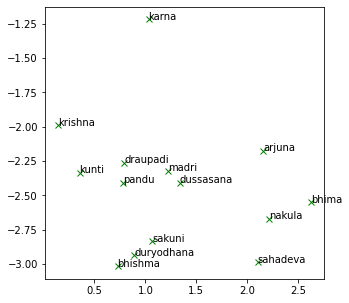

In [18]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
for character, pos in zip(characters, locs):
    m = model_load.wv.get_vector(character)
    value = pca.transform([m])[0]
    ax.plot(value[0], value[1], "gx")
    ax.annotate(words_list[pos], xy=value, xytext=value)
plt.show()
fig.savefig('word2vec.png')

###### Characters are grouped together based on word2vec learnt by the model.

##### We will see the most similar characters related to characters list as shown below.

##### characters = ['dussasana','sakuni','duryodhana','bhishma', 'krishna','madri','pandu', 'kunti', 'karna', 'bhima', 'arjuna', 'nakula', 'sahadeva', 'draupadi']

In [19]:
# Persons closer to the characters of our choice based on the word2vec model
for character in characters:
    near = model_load.wv.most_similar(character)[:5]
    nearNames = [x[0] for x in near]
    print(character, ':'.join(nearNames), sep="\t")

dussasana	sakuni:duhsasana:vikarna:chitrasena:valhika
sakuni	dussasana:duhsasana:vikarna:suvala:valhika
duryodhana	dussasana:suyodhana:jayadratha:sakuni:dhritarashtra
bhishma	salya:vaisampayana:sanjaya:kripa:savyasachin
krishna	kesava:vasudeva:govinda:madhava:vibhatsu
madri	somadatta:subhadra:suvala:prishata:bharadwaja
pandu	kunti:pritha:radha:suta:subhadra
kunti	pritha:pandu:radha:suta:santanu
karna	duhsasana:yuyudhana:abhimanyu:bhagadatta:vikarna
bhima	bhimasena:vrikodara:abhimanyu:satyaki:lakshmana
arjuna	partha:dhananjaya:vibhatsu:kama:bhima
nakula	sahadeva:vikarna:duhsasana:chitrasena:satyaki
sahadeva	nakula:satyaki:vikarna:duhsasana:chitrasena
draupadi	drupada:madri:suvala:dussasana:uncl


In [20]:
#TASK Modify the gensim word2vec model to train skip gram model.

model = gensim.models.Word2Vec(sentences, min_count=100, sg=1)
model_load = model

In [22]:
model_load.wv.most_similar('krishna')[:3]

[('kesava', 0.7575588226318359),
 ('vasudeva', 0.7467806339263916),
 ('govinda', 0.7131187915802002)]

In [23]:
model_load.wv.most_similar('bhishma')[:3]

[('salya', 0.6840908527374268),
 ('somadatta', 0.6725749969482422),
 ('bhurisrava', 0.6655009984970093)]

In [24]:
model_load.wv.most_similar('kunti')[:3]

[('pritha', 0.8589121103286743),
 ('pandu', 0.8528451919555664),
 ('radha', 0.7718920707702637)]

In [25]:
words_list = np.array([])
vector_list = np.array([])
for i in model_load.wv.vocab:
    # print(i)
    try :
        words_list = np.append(words_list, i)
        vector_list = np.append(vector_list, model_load.wv[i])
    except :
        pass
vector_list = vector_list.reshape(len(model_load.wv.vocab), -1)

In [26]:
pca = PCA(n_components=2)
pca.fit(vector_list)
compressed_list =pca.transform(vector_list)

In [27]:
vector_list.shape

(1701, 100)

In [28]:
compressed_list.shape

(1701, 2)

In [29]:
characters = ['dussasana','sakuni','duryodhana','bhishma', 'krishna','madri','pandu', 'kunti', 'karna', 'bhima', 'arjuna', 'nakula', 'sahadeva', 'draupadi']
locs = [np.where(words_list == x)[0][0] for x in characters]
print(locs)

[1627, 1626, 1522, 19, 1245, 1500, 1232, 245, 1659, 1572, 1381, 1646, 1531, 1603]


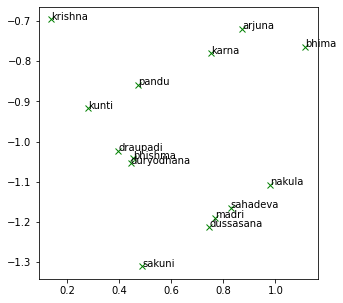

In [30]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
for character, pos in zip(characters, locs):
    m = model_load.wv.get_vector(character)
    value = pca.transform([m])[0]
    ax.plot(value[0], value[1], "gx")
    ax.annotate(words_list[pos], xy=value, xytext=value)
plt.show()
fig.savefig('word2vec.png')

In [31]:
# Persons closer to the characters of our choice based on the word2vec model
for character in characters:
    near = model_load.wv.most_similar(character)[:5]
    nearNames = [x[0] for x in near]
    print(character, ':'.join(nearNames), sep="\t")

dussasana	sakuni:duhsasana:suvala:vikarna:suyodhana
sakuni	suvala:dussasana:duhsasana:vikarna:valhika
duryodhana	suyodhana:dussasana:sakuni:duhsasana:suvala
bhishma	salya:somadatta:bhurisrava:savyasachin:aswatthaman
krishna	kesava:vasudeva:govinda:vibhatsu:madhava
madri	sahadeva:prishata:nakula:subhadra:valiant
pandu	kunti:pritha:madri:subhadra:radha
kunti	pritha:pandu:radha:madri:subhadra
karna	duhsasana:bhagadatta:jayadratha:yuyudhana:kichaka
bhima	bhimasena:vrikodara:janardana:satyaki:lakshmana
arjuna	partha:phalguna:vibhatsu:janardana:dhananjaya
nakula	sahadeva:madri:yuyudhana:chitrasena:duhsasana
sahadeva	nakula:madri:duhsasana:yuyudhana:chitrasena
draupadi	subhadra:princess:virata:drupada:madri
